In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Thyroid_Diff.csv to Thyroid_Diff.csv


In [ ]:
df = pd.read_csv('Thyroid_Diff.csv')

In [ ]:
target_column = 'Recurred'
X = df.drop(columns=[target_column])
y = df[target_column]

In [ ]:
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

In [ ]:
y_encoded = LabelEncoder().fit_transform(y)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
print (X)

     Age Gender Smoking Hx Smoking Hx Radiothreapy          Thyroid Function  \
0     27      F      No         No              No                 Euthyroid   
1     34      F      No        Yes              No                 Euthyroid   
2     30      F      No         No              No                 Euthyroid   
3     62      F      No         No              No                 Euthyroid   
4     62      F      No         No              No                 Euthyroid   
..   ...    ...     ...        ...             ...                       ...   
378   72      M     Yes        Yes             Yes                 Euthyroid   
379   81      M     Yes         No             Yes                 Euthyroid   
380   72      M     Yes        Yes              No                 Euthyroid   
381   61      M     Yes        Yes             Yes  Clinical Hyperthyroidism   
382   67      M     Yes         No              No                 Euthyroid   

            Physical Examination Adenop

In [ ]:
print (y)

0       No
1       No
2       No
3       No
4       No
      ... 
378    Yes
379    Yes
380    Yes
381    Yes
382    Yes
Name: Recurred, Length: 383, dtype: object


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)

In [ ]:
print (X_train)

[[ 7.03523286e-01  5.52830739e-01]
 [-1.99892464e+00  1.64960016e+00]
 [ 7.54227558e-01  1.02893418e+00]
 [ 8.22960234e-01 -5.34601268e-01]
 [-4.87434302e-01  1.88835875e+00]
 [-5.32460036e-01  1.94375274e+00]
 [-6.91572260e-01  5.65176404e-01]
 [-3.03156820e+00  1.69801551e+00]
 [-3.52065787e+00  1.61428292e+00]
 [-5.52877748e+00  5.04698266e-01]
 [ 7.60815890e-01  5.72395671e-02]
 [ 1.67558021e+00  1.63536833e-01]
 [ 4.69563708e-01  1.41974035e+00]
 [-2.71544618e+00  1.34807706e+00]
 [ 1.47810578e+00 -2.10803646e+00]
 [ 1.82306285e+00 -3.55944473e-01]
 [-8.77896913e-01 -8.13573888e-01]
 [ 1.87975328e+00 -1.04707528e+00]
 [ 6.79302429e-01  4.64300884e-02]
 [ 1.54066885e+00 -6.19642912e-02]
 [-1.60928199e+00  7.63528923e-01]
 [-4.95511760e+00 -1.95971441e-01]
 [ 9.28995427e-01 -1.21954961e+00]
 [ 1.57542815e-01 -1.22541863e+00]
 [ 7.45019707e-01  9.66962341e-01]
 [-9.26329594e+00 -7.30890251e+00]
 [-1.18682880e+00 -5.37423532e-01]
 [ 1.28426538e+00 -3.31535209e-01]
 [ 8.18338505e-01  3

In [ ]:
print (y_train)

[0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0
 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1
 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1
 0 0 1 0 0 0 0 0 1 0]


In [ ]:
model_pca = GaussianNB()
model_pca.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = model_pca.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[57  1]
 [ 7 12]]


In [ ]:
from sklearn.metrics import accuracy_score
akurasi = accuracy_score(y_test, y_pred)
print ("Tingkat Akurasi : %d persen "%(akurasi*100))

Tingkat Akurasi : 89 persen 


<ipython-input-21-fd34f4365193>:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


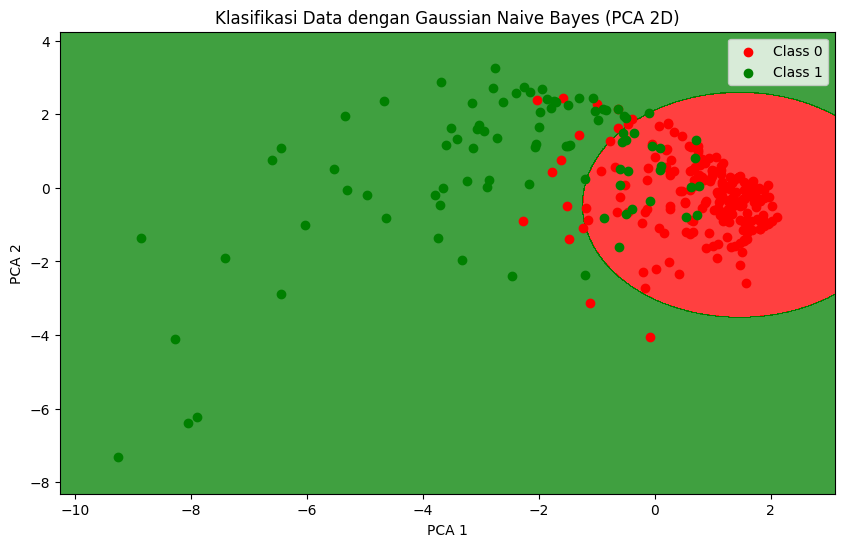

In [ ]:
x_set, y_set = X_train, y_train
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01)
)

plt.figure(figsize=(10, 6))
plt.contourf(
    x1, x2,
    model_pca.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha=0.75,
    cmap=ListedColormap(('red', 'green'))
)
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        x_set[y_set == j, 0], x_set[y_set == j, 1],
        c=ListedColormap(('red', 'green'))(i), label=f'Class {j}'
    )

plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

<ipython-input-20-78856e2ced1f>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


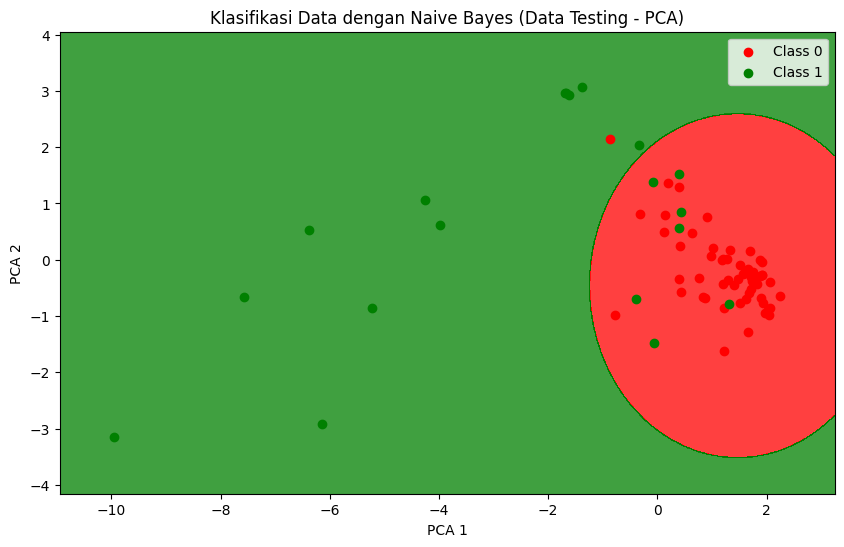

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = X_test, y_test
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01)
)
plt.figure(figsize=(10, 6))
plt.contourf(
    x1, x2,
    model_pca.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha=0.75,
    cmap=ListedColormap(('red', 'green'))
)

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        x_set[y_set == j, 0], x_set[y_set == j, 1],
        c=ListedColormap(('red', 'green'))(i), label=f'Class {j}'
    )

plt.title('Klasifikasi Data dengan Naive Bayes (Data Testing)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()